# INM433 Visual Analytics: Lab07

# Building computer models with visual analytics

The goals of this exercise are use visualisations in creation, evaluation, and refinement of computer models. This is done by example of univariate regression models, which is a very simple model type. The focus of the exercise is not the modelling by itself but application of the principles of conscious model building, i.e., involvement of analytical reasoning throughout the process.

The exercise includes creation of a univariate regression model, variation of the model parameter (order), exploration of model residuals, and construction of multiple models for different divisions of the input data.

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import pylab as py 

### Data
The exercise is done using census data for the London wards. The file population_perc.csv contains attributes describing the population structure as percentages of different population groups based on the age, sex, nationality, occupation, qualification, and other parameters. There are a few other attributes, such as the mean age and the average distance to work.

#### Load the data and remove rows with nulls:

In [2]:
data = pd.read_csv('population_perc.csv')
datann = data[data['Borough'].notnull()];
datann.describe()

,N of all usual residents,Area Hectares,Density (number of persons per hectare),Mean Age,Median Age,Average distance to work (km),age=0 to 4: Population % by age,age=5 to 7: Population % by age,age=8 to 9: Population % by age,age=10 to 14: Population % by age,...,distance to work=Less than 2km: Population % by distance travelled to work,distance to work=2km to less than 5km: Population % by distance travelled to work,distance to work=5km to less than 10km: Population % by distance travelled to work,distance to work=10km to less than 20km: Population % by distance travelled to work,distance to work=20km to less than 30km: Population % by distance travelled to work,distance to work=30km to less than 40km: Population % by distance travelled to work,distance to work=40km to less than 60km: Population % by distance travelled to work,distance to work=60km and over: Population % by distance travelled to work,distance to work=Work mainly at or from home: Population % by distance travelled to work,distance to work=Other: Population % by distance travelled to work
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,13087.445513,251.482853,81.072596,35.809455,34.257212,11.316987,7.155449,3.651282,2.207051,5.557853,...,5.833013,8.867949,11.232212,9.742628,1.951282,0.477244,0.348718,0.637019,4.770513,5.233494
std,2430.502303,255.672602,47.597964,3.086301,4.019309,2.104608,1.471681,0.770669,0.500191,1.319420,...,2.486367,4.007589,5.636473,5.110623,2.129627,0.222191,0.112029,0.130654,1.744939,1.130924
min,5110.000000,35.360000,1.800000,29.000000,26.000000,6.400000,2.700000,1.300000,0.700000,1.400000,...,2.300000,1.800000,3.600000,1.400000,0.200000,0.100000,0.100000,0.300000,1.700000,3.100000
25%,11200.000000,119.900000,45.300000,33.575000,31.000000,9.900000,6.100000,3.200000,1.900000,4.700000,...,4.400000,6.200000,7.400000,5.175000,0.800000,0.300000,0.300000,0.500000,3.500000,4.400000
50%,12989.500000,184.565000,69.050000,35.400000,33.000000,11.400000,7.100000,3.600000,2.200000,5.750000,...,5.200000,7.800000,9.200000,9.800000,1.200000,0.400000,0.300000,0.600000,4.500000,5.000000
75%,14864.750000,284.425000,109.550000,37.900000,37.000000,12.800000,8.000000,4.100000,2.500000,6.500000,...,6.500000,10.200000,13.300000,13.200000,2.000000,0.600000,0.400000,0.700000,5.600000,5.700000
max,23084.000000,2903.520000,264.700000,44.100000,46.000000,18.100000,13.200000,6.300000,4.100000,9.400000,...,20.100000,27.800000,36.600000,28.400000,13.900000,1.300000,1.000000,1.200000,12.800000,9.300000


In [3]:
datann.head(3)

,id,Name,Borough,N of all usual residents,Area Hectares,Density (number of persons per hectare),Mean Age,Median Age,Average distance to work (km),age=0 to 4: Population % by age,...,distance to work=Less than 2km: Population % by distance travelled to work,distance to work=2km to less than 5km: Population % by distance travelled to work,distance to work=5km to less than 10km: Population % by distance travelled to work,distance to work=10km to less than 20km: Population % by distance travelled to work,distance to work=20km to less than 30km: Population % by distance travelled to work,distance to work=30km to less than 40km: Population % by distance travelled to work,distance to work=40km to less than 60km: Population % by distance travelled to work,distance to work=60km and over: Population % by distance travelled to work,distance to work=Work mainly at or from home: Population % by distance travelled to work,distance to work=Other: Population % by distance travelled to work
25,E05000026,Abbey,BarkingDagenham,12786.0,125.24,102.1,29.4,28.0,14.1,11.0,...,4.3,4.8,7.5,13.2,2.0,0.5,0.4,0.8,2.7,6.7
26,E05000027,Alibon,BarkingDagenham,10385.0,136.06,76.3,33.5,32.0,13.4,10.1,...,5.0,7.5,5.5,9.5,3.5,0.7,0.4,0.6,2.2,5.7
27,E05000028,Becontree,BarkingDagenham,11545.0,128.59,89.8,33.1,32.0,14.9,9.6,...,3.6,8.8,5.8,10.3,1.9,0.5,0.4,0.8,2.8,5.4


In [4]:
datann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 25 to 648
Columns: 147 entries, id to distance to work=Other: Population % by distance travelled to work
dtypes: float64(144), object(3)
memory usage: 721.5+ KB


## Feature selection

Our dependent variable will be "health condition=Very good health: Population % by health condition". We want to build a regression model representing the relationship of this variable to the education level of the population. There are several attributes specifying proportions of the population by different education levels. We want to take one of them as an independent variable. To make an informed selection, we shall look at the joint distributions of the dependent variable and the candidate features (independent variables).

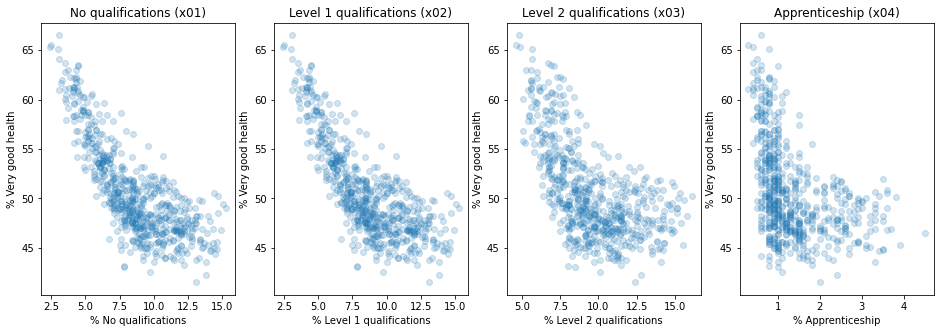

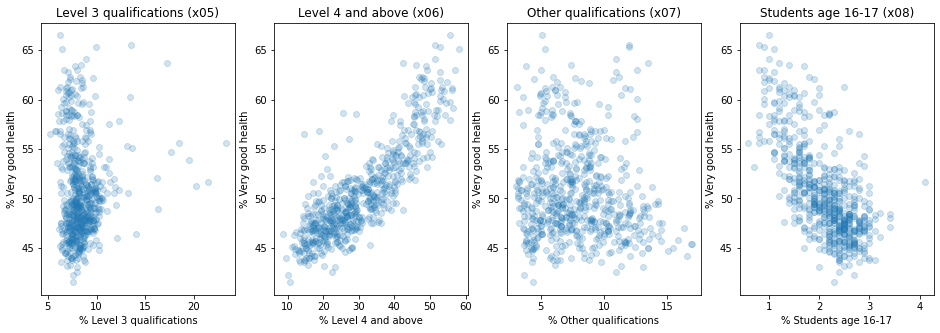

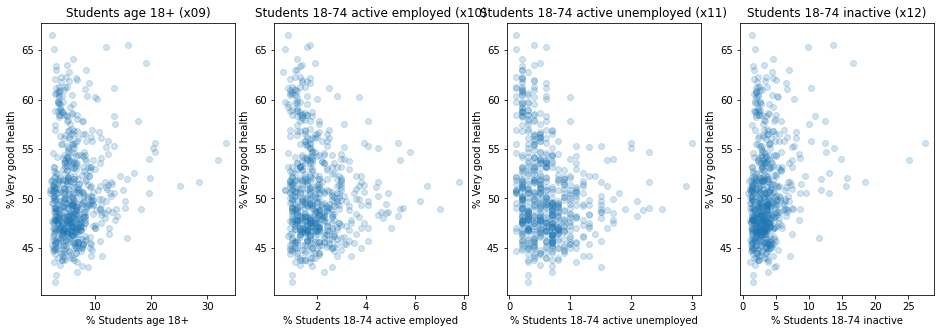

In [5]:
# dependent variable
y="health condition=Very good health: Population % by health condition";
# features
x01="qualification (study)=No qualifications: Population % by qualification or study"
x02="qualification (study)=Level 1 qualifications: Population % by qualification or study"
x03="qualification (study)=Level 2 qualifications: Population % by qualification or study"
x04="qualification (study)=Apprenticeship: Population % by qualification or study"
x05="qualification (study)=Level 3 qualifications: Population % by qualification or study"
x06="qualification (study)=Level 4 qualifications and above: Population % by qualification or study"
x07="qualification (study)=Other qualifications: Population % by qualification or study"
x08="qualification (study)=Schoolchildren and full-time students: Age 16 to 17: Population % by qualification or study"
x09="qualification (study)=Schoolchildren and full-time students: Age 18 and over: Population % by qualification or study"
x10="qualification (study)=Full-time students: Age 18 to 74: Active: In employment: Population % by qualification or study"
x11="qualification (study)=Full-time students: Age 18 to 74: Active: Unemployed: Population % by qualification or study"
x12="qualification (study)=Full-time students: Age 18 to 74: Inactive: Population % by qualification or study"

fig = plt.figure(figsize=(16,5))

scp = fig.add_subplot(141)
scp.scatter(datann.loc[:,x02],datann.loc[:,y], alpha=.2)
scp.set_title('No qualifications (x01)')
scp.set_xlabel('% No qualifications')
scp.set_ylabel('% Very good health')

scp = fig.add_subplot(142)
scp.scatter(datann.loc[:,x02],datann.loc[:,y], alpha=.2)
scp.set_title('Level 1 qualifications (x02)')
scp.set_xlabel('% Level 1 qualifications')
scp.set_ylabel('% Very good health')

scp = fig.add_subplot(143)
scp.scatter(datann.loc[:,x03],datann.loc[:,y], alpha=.2)
scp.set_title('Level 2 qualifications (x03)')
scp.set_xlabel('% Level 2 qualifications')
scp.set_ylabel('% Very good health')

scp = fig.add_subplot(144)
scp.scatter(datann.loc[:,x04],datann.loc[:,y], alpha=.2)
scp.set_title('Apprenticeship (x04)')
scp.set_xlabel('% Apprenticeship')
scp.set_ylabel('% Very good health')

plt.show()

fig = plt.figure(figsize=(16,5))

scp = fig.add_subplot(141)
scp.scatter(datann.loc[:,x05],datann.loc[:,y], alpha=.2)
scp.set_title('Level 3 qualifications (x05)')
scp.set_xlabel('% Level 3 qualifications')
scp.set_ylabel('% Very good health')

scp = fig.add_subplot(142)
scp.scatter(datann.loc[:,x06],datann.loc[:,y], alpha=.2)
scp.set_title('Level 4 and above (x06)')
scp.set_xlabel('% Level 4 and above')
scp.set_ylabel('% Very good health')

scp = fig.add_subplot(143)
scp.scatter(datann.loc[:,x07],datann.loc[:,y], alpha=.2)
scp.set_title('Other qualifications (x07)')
scp.set_xlabel('% Other qualifications')
scp.set_ylabel('% Very good health')

scp = fig.add_subplot(144)
scp.scatter(datann.loc[:,x08],datann.loc[:,y], alpha=.2)
scp.set_title('Students age 16-17 (x08)')
scp.set_xlabel('% Students age 16-17')
scp.set_ylabel('% Very good health')

plt.show()

fig = plt.figure(figsize=(16,5))

scp = fig.add_subplot(141)
scp.scatter(datann.loc[:,x09],datann.loc[:,y], alpha=.2)
scp.set_title('Students age 18+ (x09)')
scp.set_xlabel('% Students age 18+')
scp.set_ylabel('% Very good health')

scp = fig.add_subplot(142)
scp.scatter(datann.loc[:,x10],datann.loc[:,y], alpha=.2)
scp.set_title('Students 18-74 active employed (x10)')
scp.set_xlabel('% Students 18-74 active employed')
scp.set_ylabel('% Very good health')

scp = fig.add_subplot(143)
scp.scatter(datann.loc[:,x11],datann.loc[:,y], alpha=.2)
scp.set_title('Students 18-74 active unemployed (x11)')
scp.set_xlabel('% Students 18-74 active unemployed')
scp.set_ylabel('% Very good health')

scp = fig.add_subplot(144)
scp.scatter(datann.loc[:,x12],datann.loc[:,y], alpha=.2)
scp.set_title('Students 18-74 inactive (x12)')
scp.set_xlabel('% Students 18-74 inactive')
scp.set_ylabel('% Very good health')

plt.show()

## Trying different polynomial orders

scatterplots suggest us that the most relevant feature to predicting the percentage of the population with very good health is x06, which is the percentage of the people having high qualification (level 4 and above). We shall select this feature for the creation of the regression model.

We shall build and compare polynomial regression models of the orders 1, 2, and 3. We begin with putting corresponding regression lines on the scatterplots with the axes corresponding to the independent and dependent variables.

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


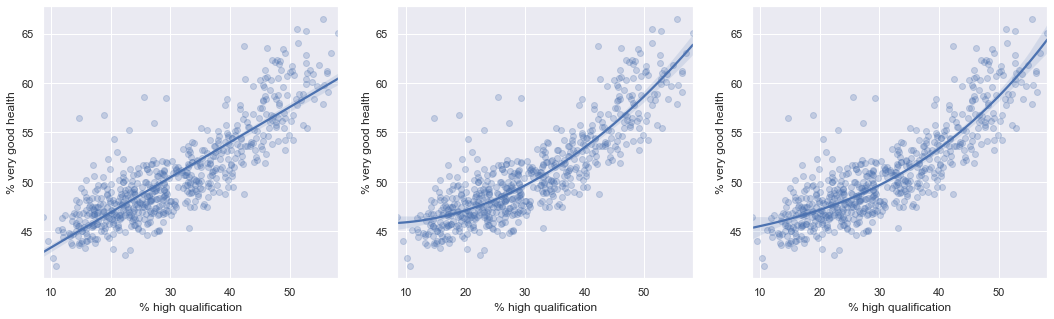

In [6]:
datann.rename(columns = {x06:'% high qualification'}, inplace = True)
datann.rename(columns = {y:'% very good health'}, inplace = True)
xattr='% high qualification'
yattr='% very good health'

sns.set(color_codes=True)

fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.regplot(x=xattr, y=yattr, data=datann, scatter_kws={'alpha':0.25}, ax = axes[0]);
sns.regplot(x=xattr, y=yattr, data=datann, order=2, scatter_kws={'alpha':0.25}, ax = axes[1]);
sns.regplot(x=xattr, y=yattr, data=datann, order=3, scatter_kws={'alpha':0.25}, ax = axes[2]);
plt.show()

### Exploring the distributions of the residuals

Now we shall look at the resuduals of the models of the orders 1, 2, and 3. Residual plots are not supposed to show any structure, otherwise you need to make better models. We also look at the frequency histograms of the residuals shown at the right margins of the scatterplots. A randon distribution should have a bell-shaped histogram with the centre at zero, i.e., the mean value equals zero.

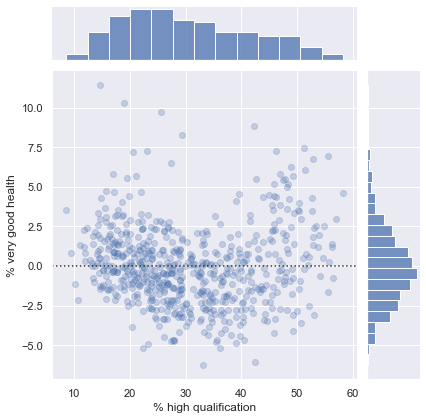

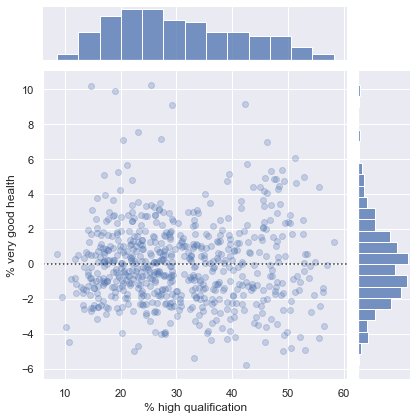

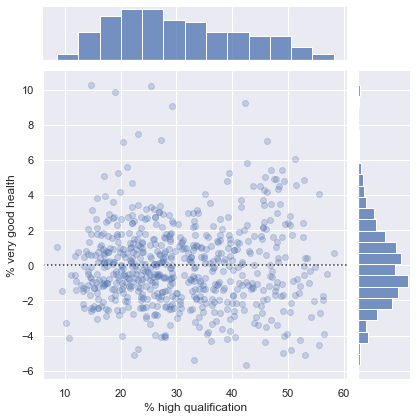

In [7]:
sns.jointplot(x=xattr, y=yattr, data=datann, kind="resid", scatter_kws={'alpha':0.25});
plt.show()

sns.jointplot(x=xattr, y=yattr, data=datann, order=2, kind="resid", scatter_kws={'alpha':0.25});
plt.show()

sns.jointplot(x=xattr, y=yattr, data=datann, order=3, kind="resid", scatter_kws={'alpha':0.25});
plt.show()


We see that the histogram of the residuals for the order=1 is not symmetric with respect to 0 but shifted towards the negative side. The distributions of the residuals for the orders 2 and 3 look similar. The model with the lower polynomial order is preferable in this case, as it is simpler and less likely to be overfitted. 

### An example of generating a model and obtaining its residuals
For a more detailed analysis of the model residuals, the values of the residuals need to be obtained from the model. However, we have, in fact, only regression plots but not the models. Unfortunately, we cannot obtain the models from the plots. 

To create models and get their predictions and residuals, we need to use other tools. Here, we shall do it for a linear regression model (i.e., a model of order=1). Creatingmore complex models goes beyond the scope of this exercise. You can try to do it on your own.

We shall build a linear regression model, obtain its residuals, and visualise their distribution in a hostogram. Additionally, we shall create a Q-Q plot (quantile-quantile plot) for comparing the distribution of the residuals with a normal distribution.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


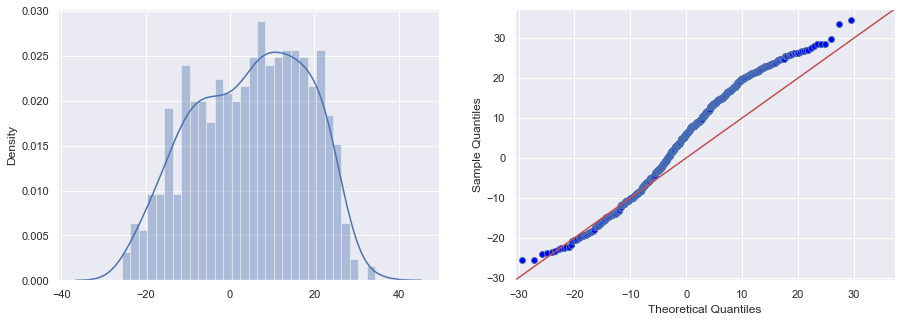

In [8]:
olsmod = sm.OLS(datann.loc[:,yattr], datann.loc[:,xattr])
olsres = olsmod.fit()
#print(olsres.summary())

fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(olsres.resid,bins=30,ax=axes[0])
sm.qqplot(olsres.resid, scale = 10, line ='45',ax=axes[1]) 

plt.show()


## Model refinement by data partitioning
### Partitioning based on values of a single attribute

It can be expected that the health condition may be related to the age structure of the population. We shall try to use the attribute 'Mean Age' as a conditional variable for dividing the data set into subsets.

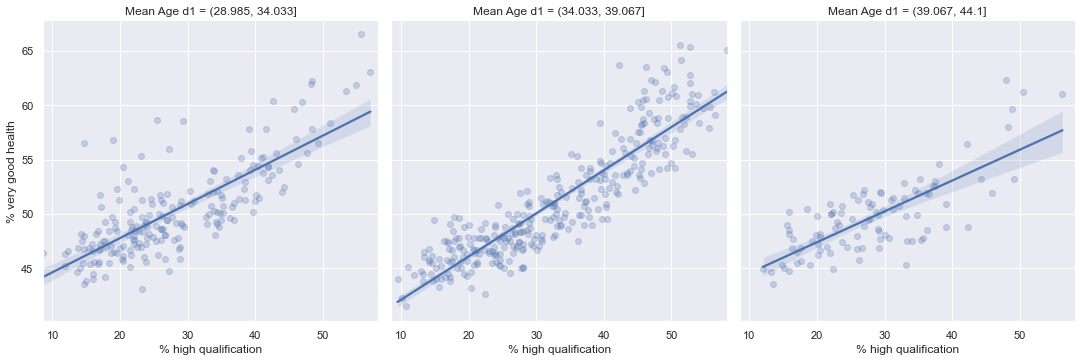

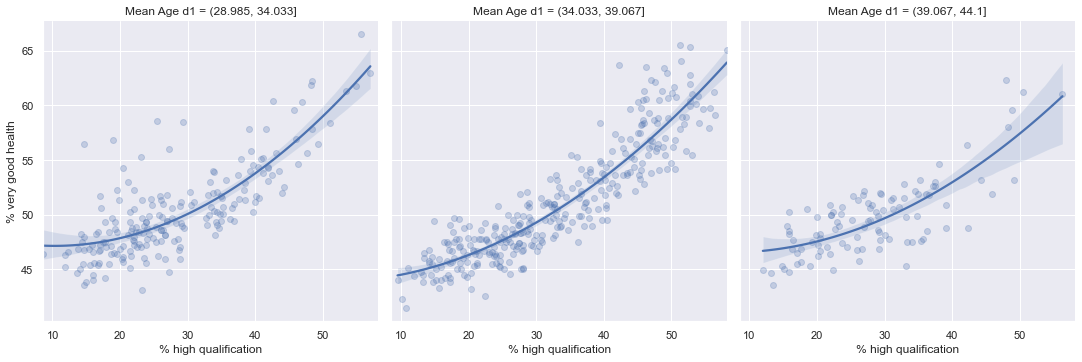

In [9]:
pd.options.mode.chained_assignment = None  # default='warn'
datann['Mean Age d1']=pd.cut(datann['Mean Age'], 3); # try different numbers of intervals, e.g., from 3 to 5

sns.lmplot(x=xattr, y=yattr, data=datann, order=1, col="Mean Age d1", scatter_kws={'alpha':0.25});
plt.show()

sns.lmplot(x=xattr, y=yattr, data=datann, order=2, col="Mean Age d1", scatter_kws={'alpha':0.25});
plt.show()

Although the results look interesting, we observe imbalance in the counts of the wards in the subsets. Therefore, instead of pd.cut() that divides attribute range into equal intervals, we'll use pd.qcut() that produces equal class sizes:

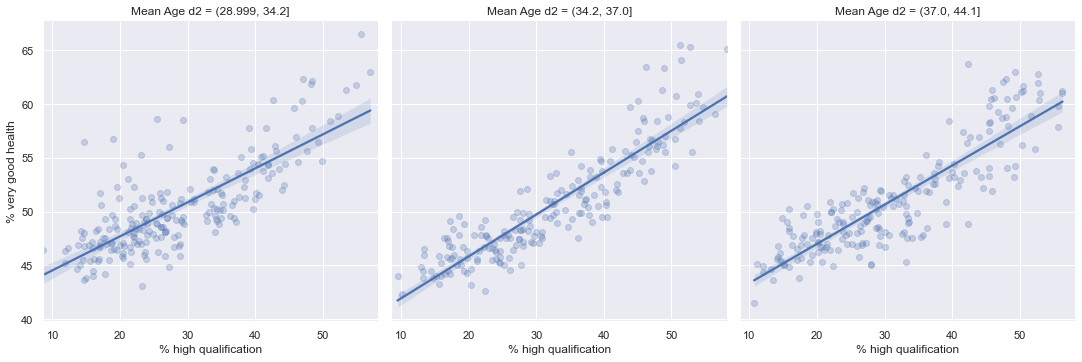

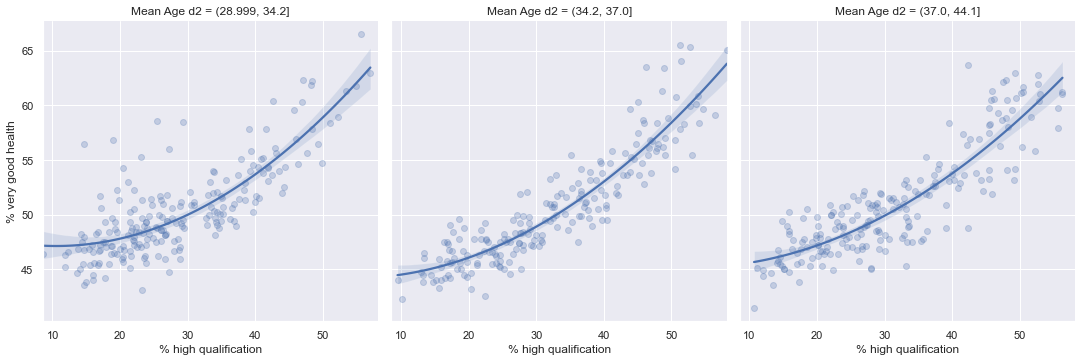

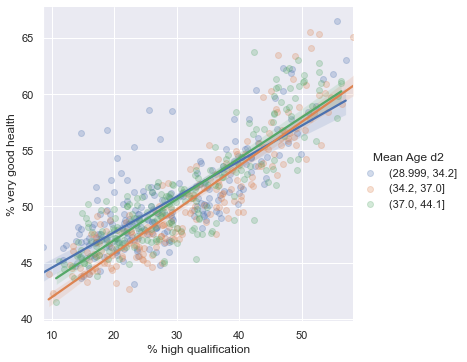

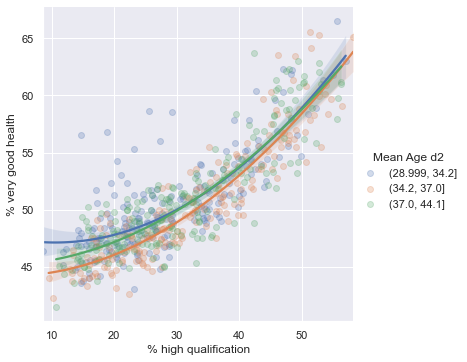

In [10]:
datann['Mean Age d2']=pd.qcut(datann['Mean Age'], 3);

sns.lmplot(x=xattr, y=yattr, data=datann, order=1, col="Mean Age d2", scatter_kws={'alpha':0.25});
plt.show()

sns.lmplot(x=xattr, y=yattr, data=datann, order=2, col="Mean Age d2", scatter_kws={'alpha':0.25});
plt.show()

sns.lmplot(x=xattr, y=yattr, data=datann, order=1, hue="Mean Age d2", scatter_kws={'alpha':0.25});
plt.show()

sns.lmplot(x=xattr, y=yattr, data=datann, order=2, hue="Mean Age d2", scatter_kws={'alpha':0.25});
plt.show()

We see that the division of the data based on the mean age does not significantly affect the shape of the dependency. Hence, this division will not help us to refine the model.

### Partitioning based on values of several attributes by means of clustering
#### Selection of features for the clustering

Another approach for segmenting the data set is to use clustering. We want to cluster the data based on the age structure. In our dataset, there are 16 attributes describing the age structure by specifying proportions of different age groups. It would not be appropriate to use all these attributes for clustering as som of them may be correlated. To select a small subset consisting of uncorrelated attributes, we shall create a correlation matrix.

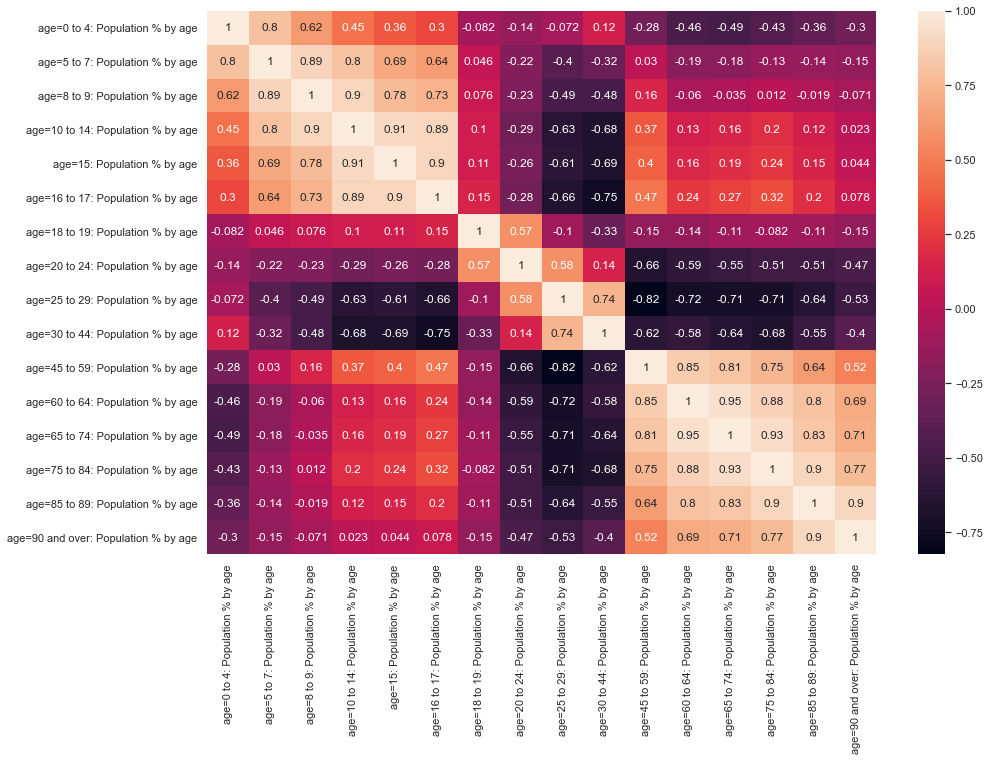

In [11]:
age_data=datann.loc[:,"age=0 to 4: Population % by age":"age=90 and over: Population % by age"]
corrMatrix = age_data.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

The correlation matrix reveals two subsets of strongly correlated attributes: proportions of age groups from 0-4 to 16-17 and proportions of age groups from 45-59 to 90 and over. The proportions of the age groups 25-29 and 30-44 are correlated a bit weaker, and the proportions of remaining two age groups 18-19 and 20-24 have yet a weaker positive correlation.

One approach to getting suitable features for clustering would be to select a single attribute from each group of correlated attributes. Another approach would be to produce derived attributes by summing correlated attributes. We shall take the second approach. We generate four attributes corresponding to the age intervals 0-17, 18-24, 25-44, and 45 and over.

In [12]:
datann['% 0-17']=datann.loc[:, "age=0 to 4: Population % by age":"age=16 to 17: Population % by age"].sum(axis=1)
datann['% 18-24']=datann.loc[:, "age=18 to 19: Population % by age":"age=20 to 24: Population % by age"].sum(axis=1)
datann['% 25-44']=datann.loc[:, "age=25 to 29: Population % by age":"age=30 to 44: Population % by age"].sum(axis=1)
datann['% 45+']=datann.loc[:, "age=45 to 59: Population % by age":"age=90 and over: Population % by age"].sum(axis=1)

#### Clustering
Now we shall apply partition-based clustering (k-means) to the attributes we have just derived. To see what data each cluster consists of, we shall create a scatterplot matrix where the members of the clusters are differently coloured.

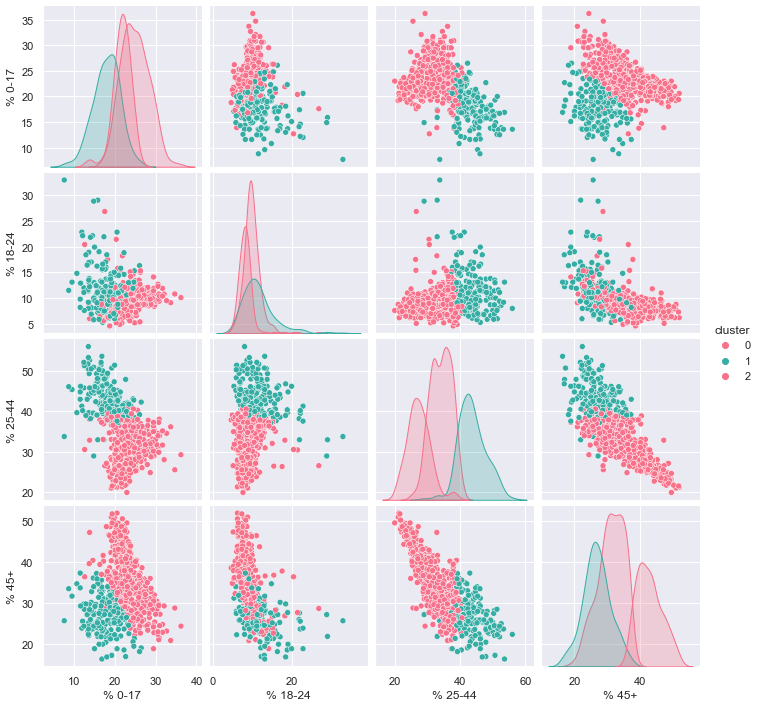

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

attrlist=['% 0-17','% 18-24','% 25-44','% 45+']

age_data=datann.loc[:,attrlist]

scaler = MinMaxScaler()
age_data_scaled=scaler.fit_transform(age_data)

# Number of clusters
kmeans = KMeans(n_clusters=3) # change parameters here for experimenting
# Fitting the input data
kmeans = kmeans.fit(age_data_scaled)
# Getting the cluster labels
datann['cluster'] = kmeans.predict(age_data_scaled)

sns.pairplot(data=datann, hue='cluster', palette="husl", diag_kind="kde", vars=attrlist);
plt.show()

#### Building separate models for the clusters

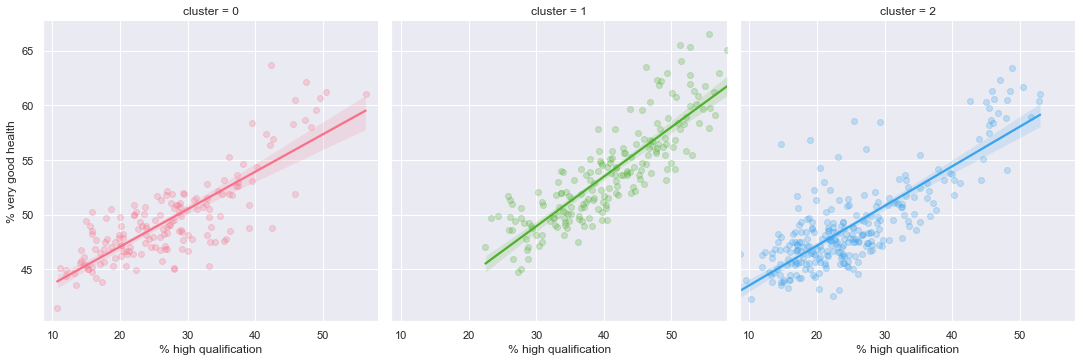

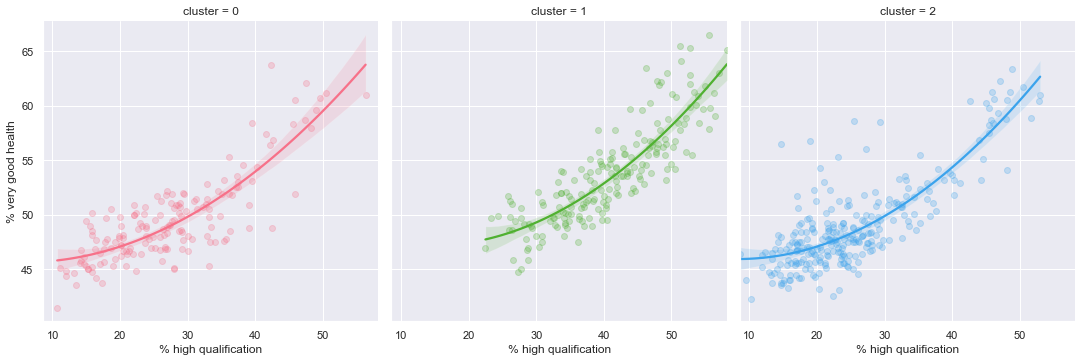

In [14]:
sns.lmplot(x=xattr, y=yattr, data=datann, order=1, col="cluster", hue='cluster', palette="husl", scatter_kws={'alpha':0.25});
plt.show()

sns.lmplot(x=xattr, y=yattr, data=datann, order=2, col="cluster", hue='cluster', palette="husl", scatter_kws={'alpha':0.25});
plt.show()

For a more convenient comparison, we shall put the regression lines on the same plot and compare their shapes.

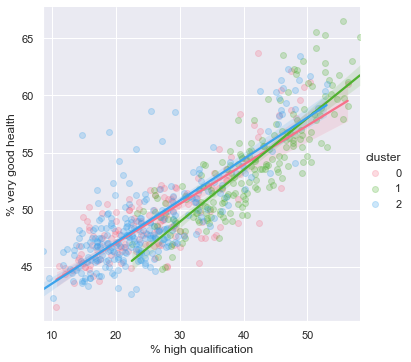

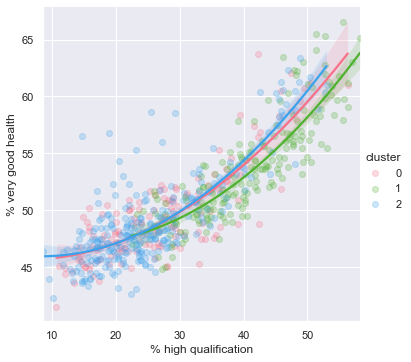

In [15]:
sns.lmplot(x=xattr, y=yattr, data=datann, order=1, hue='cluster', palette="husl", scatter_kws={'alpha':0.25});
sns.lmplot(x=xattr, y=yattr, data=datann, order=2, hue='cluster', palette="husl", scatter_kws={'alpha':0.25});
plt.show()


We see that the first order models differ by the line inclination angles, whereas the second order models do not differ much.  To decide whether it makes sense to refine (but also to complicate) the model by partitioning the data into the clusters, we shall look at the distributions of the residuals of the first-order and second-order cluster-wise models.

#### Residuals of the first-order models

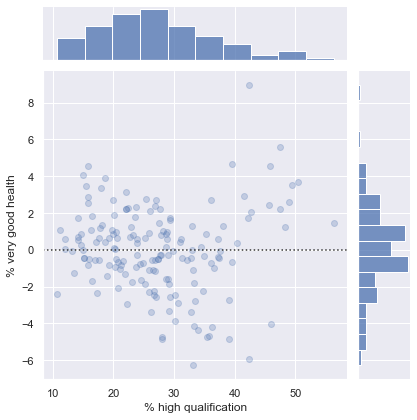

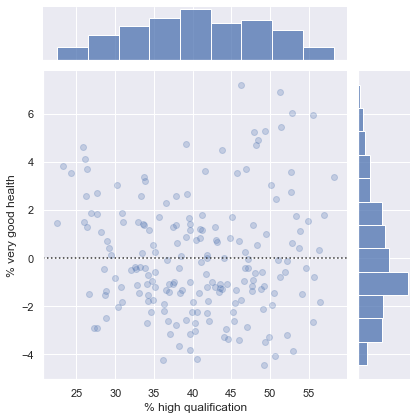

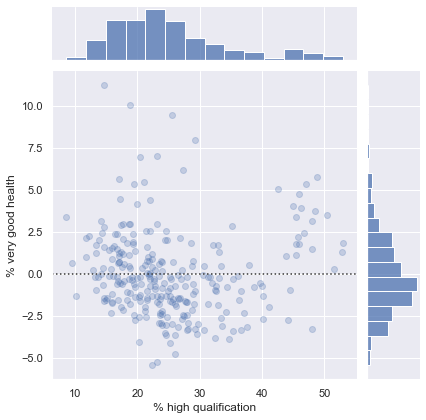

In [16]:
sns.jointplot(x=xattr, y=yattr, data=datann.loc[datann['cluster']==0,:], kind="resid", scatter_kws={'alpha':0.25});
plt.show()
sns.jointplot(x=xattr, y=yattr, data=datann.loc[datann['cluster']==1,:], kind="resid", scatter_kws={'alpha':0.25});
plt.show()
sns.jointplot(x=xattr, y=yattr, data=datann.loc[datann['cluster']==2,:], kind="resid", scatter_kws={'alpha':0.25});
plt.show()


#### Residuals of the second-order models

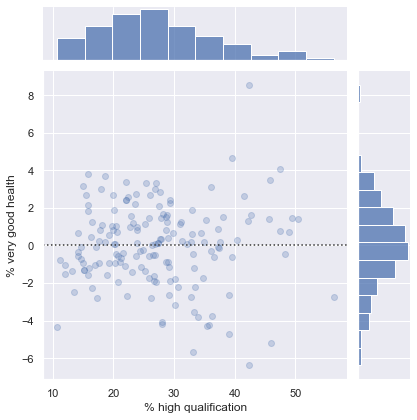

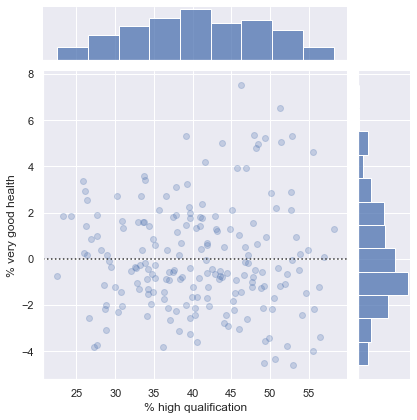

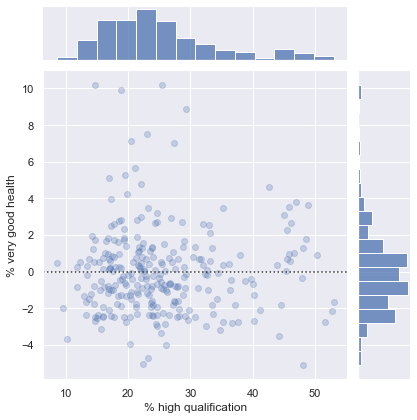

In [17]:
sns.jointplot(x=xattr, y=yattr, data=datann.loc[datann['cluster']==0,:], order=2, kind="resid", scatter_kws={'alpha':0.25});
plt.show()
sns.jointplot(x=xattr, y=yattr, data=datann.loc[datann['cluster']==1,:], order=2, kind="resid", scatter_kws={'alpha':0.25});
plt.show()
sns.jointplot(x=xattr, y=yattr, data=datann.loc[datann['cluster']==2,:], order=2, kind="resid", scatter_kws={'alpha':0.25});
plt.show()


The residuals for the clusters 0 and 1 do not appear quite random. Hence, we see that the partitioning does not improve the distribution of the residuals in comparison to the single model. Therefore, we decide that the global model should be taken as the final result of the process.